## <center>Sprawozdanie 2</center>
<center>Adrian Janakiewicz</center>

***Imports***

In [1]:
from  math import pi, e, factorial, fabs, fsum
import matplotlib.pyplot as plt

<a id='zad1'></a>
***Zadanie 1.***   

In [3]:
p = [pi, e, 10**pi, factorial(9)]
p_ = [22/7, 2.718, 1397, (18*pi)**0.5*(9/e)**9]

for i in range(p.__len__()):
    abs_err = fabs(p[i] - p_[i])
    rel_err = fabs(abs_err/p[i])
    print("Błąd względny:", abs_err)
    print("Błąd bezwzględny:", rel_err, end="\n\n")

Błąd względny: 0.0012644892673496777
Błąd bezwzględny: 0.0004024994347707008

Błąd względny: 0.0002818284590451192
Błąd bezwzględny: 0.00010367889601972718

Błąd względny: 11.544268632989315
Błąd bezwzględny: 0.008332470227394952

Błąd względny: 3343.1271580516477
Błąd bezwzględny: 0.009212762230080598



<a id='zad2'></a>
***Zadanie 2.***   

In [5]:
def G(p, n=1):
    if n == 1:
        return (10**p*(1+p*round(pi, 15)*10**(-p))-10**p)/p
    return [G(x) for x in range(1, n+1)]

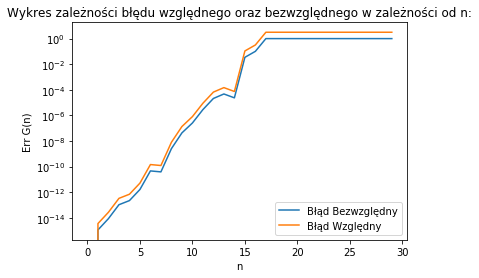

In [6]:
n = 30

w_ = G(1, n)
abs_err = [fabs(i-pi) for i in w_]
rel_err = [fabs(i/pi) for i in abs_err]

plt.semilogy([i for i in range(n)], rel_err, basey=10, label='Błąd Bezwzględny')
plt.semilogy([i for i in range(n)], abs_err, basey=10, label='Błąd Względny')
plt.title('Wykres zależności błędu względnego oraz bezwzględnego w zależności od n:')
plt.xlabel('n')
plt.ylabel('Err G(n)')
plt.legend(loc='lower right')
plt.show()

1. Czy wartość $G(p)$ obliczona w sposób analityczny zależy od $p$?
2. Jak zmienia się błąd w zależności od $n$ i co można stwierdzić na podstawie jego zachowania? 
3. Jaki rodzaj błędu tutaj występuje?

<ol>
<li>Nie, nie zależy, zawsze wynosi $\pi$.</li>
<li>Wraz ze wzrostrem $n$ wzrasta błąd i na taj podstawie można stwierdzić, że błąd zależy od wartości $n$.</li>
<li>Jest to błąd zaokrągleń do $n=17$, później błąd obcięcia.</li>
</ol>

<a id='zad3'></a>
***Zadanie 3.***

Wersja obliczania eksponenty z sumowaniem od wyrazu największego.

In [9]:
def exp2(n):
    sum = 0
    for i in range(0, n + 1):
        sum += 1/factorial(i)
    return sum

Wersja z sumowaniem od wyrazu najmniejszego.

In [10]:
def exp3(n):
    sum = 0
    for i in range(n, -1, -1):
        sum += 1/factorial(i)
    return sum

Błąd względny: [0.0005941848175817597, 0.0005941848175815963, 1.0047766310211053e-08, 1.0047766310211053e-08, 1.6337129034990842e-16, 0.0]
Błąd bezwzględny: [0.0016151617923787498, 0.0016151617923783057, 2.7312660577649694e-08, 2.7312660577649694e-08, 4.440892098500626e-16, 0.0]



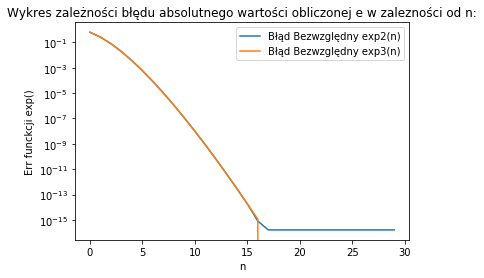

In [11]:
e1 = exp2(5)
e2 = exp3(5)

e3 = exp2(10)
e4 = exp3(10)

e5 = exp2(35)
e6 = exp3(35)

abs_err = [fabs(e - e1), fabs(e - e2), fabs(e - e3), fabs(e - e4), fabs(e - e5), fabs(e - e6)]
rel_err = [x/e for x in abs_err]

print("Błąd względny:", rel_err)
print("Błąd bezwzględny:", abs_err, end="\n\n")

plt.semilogy([i for i in range(n)], [fabs(exp2(i)-e)/e for i in range(n)], label='Błąd Bezwzględny exp2(n)')
plt.semilogy([i for i in range(n)], [fabs(exp3(i)-e)/e for i in range(n)], label='Błąd Bezwzględny exp3(n)')
plt.title('Wykres zależności błędu absolutnego wartości obliczonej e w zalezności od n:')
plt.xlabel('n')
plt.ylabel('Err funckcji exp()')
plt.legend()
plt.show()

<a id='zad4'></a>
***Zadanie 4.***

In [50]:
a = 1.0
b = 0
for i in range(50, 55):
    b= 2**(-i)
    print("{}: ".format(i), a + b- a - b)
print("b = ", 2**(-52))

50:  0.0
51:  0.0
52:  0.0
53:  -1.1102230246251565e-16
54:  -5.551115123125783e-17
b =  2.220446049250313e-16


b = 2^-52, zatem mamy 53 bity mantysy. <br />
Mamy tu do czynienia z błędem obcięcia majacym miejsce od liczb mniejszych od 2^-52.

Dlaczego sprawdzamy kolejne potęgi dwójki?
Z powodu sposobu zapisu liczb w komputerze. 

<a id='zad5'></a>
***Zadanie 5.***

In [55]:
print((fsum([1/(x*x) for x in range(n, 0, -1)])*6)**0.5)

3.140638056205993


Mamy tu do czynienia z błędami obcięcia (skończona liczba elementów tej nieskończonej sumy) oraz błędami zaokrągleń (bardzo małe liczby w kolejnych krokach sumy).